# this is my first notebook

In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting


In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")  # Load the dataset
df.head()  # Show first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.fillna({'Age': df['Age'].median()}, inplace=True)


In [5]:
df.drop(columns=['Cabin'], inplace=True)


Text(0.5, 1.0, 'Survival Rate by Gender')

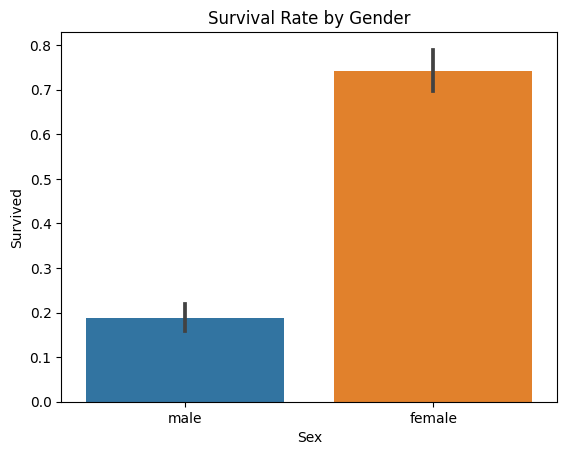

In [6]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

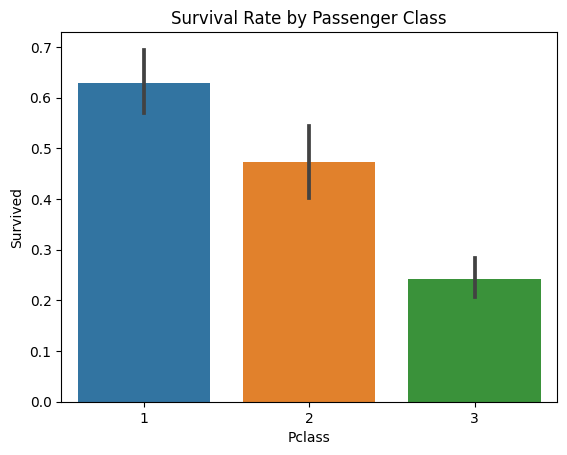

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution of Survivors vs. Non-Survivors')

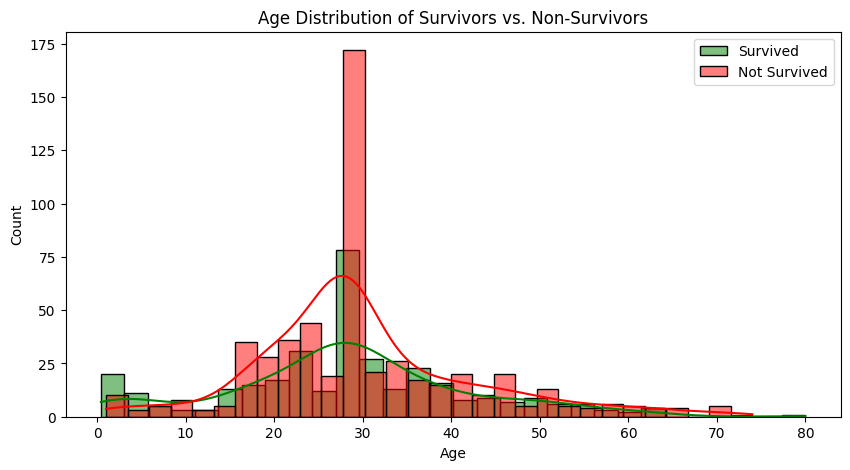

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Survived']==1]['Age'], bins=30, kde=True, color="green", label="Survived")
sns.histplot(df[df['Survived']==0]['Age'], bins=30, kde=True, color="red", label="Not Survived")
plt.legend()
plt.title("Age Distribution of Survivors vs. Non-Survivors")


Text(0.5, 1.0, 'Survival Rate by Family Size')

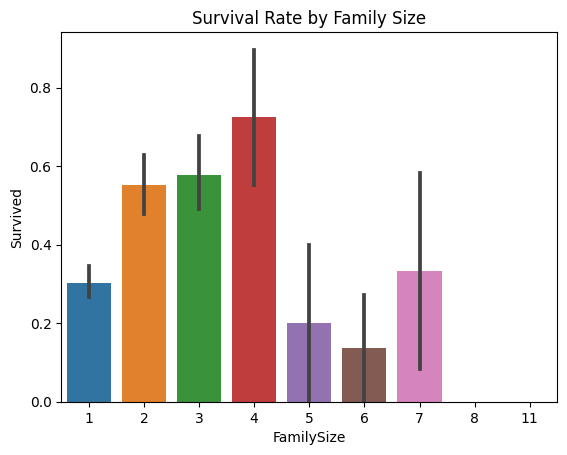

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")


Text(0.5, 1.0, 'Fare Distribution by Class')

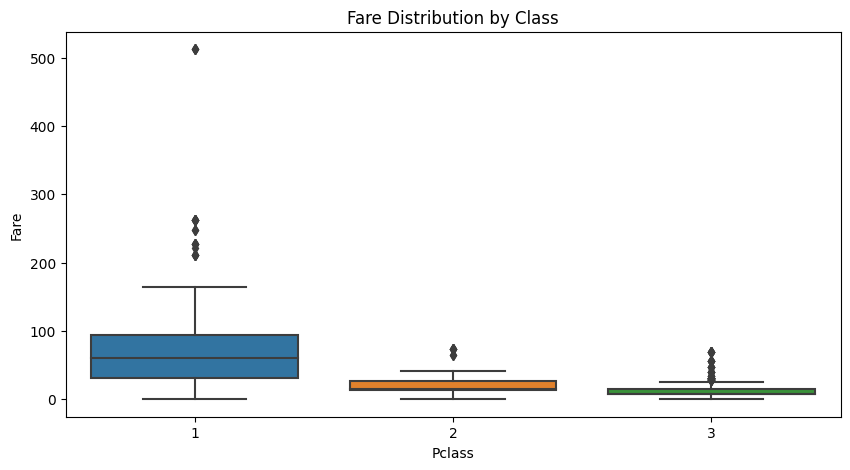

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Class")


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convert categorical features into numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna('S', inplace=True)  # Fill missing Embarked with most common value
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


<ipython-input-11-72f9ad47adfd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)  # Fill missing Embarked with most common value


Model Accuracy: 0.82
